# Paper plots

In [76]:
%matplotlib widget

%load_ext autoreload
%autoreload 2

import sys
from loguru import logger

import golden_an_bn_net
import corpora
import networks
import visualizations
import utils

logger.remove()
logger.add(sys.stderr, level="INFO")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2

### Corpora & Nets

In [77]:
PLOT_SEED = 10

corpus_seed = 100
train_size = 1000
p = 0.3

utils.seed(corpus_seed)
train_corpus = corpora.make_an_bn_sampled(
        batch_size=train_size,
        p=p,
    )

test_corpus = corpora.make_an_bn_from_n_values(n_values=tuple(range(1, 1500)), p=p)

golden_net = golden_an_bn_net.make_an_bn_lstm(p=0.3, hidden_size=3)

best_trained_net = utils.load_trained_net("1c67e83e") # By val loss, including early stop.
best_trained_no_early_stop = utils.load_trained_net("1ba97bda") # Omitting early stop. 

2024-01-27 13:25:31.533 | INFO     | corpora:make_an_bn_sampled:141 - Created corpus an_bn__p_0.3__batch_1000
2024-01-27 13:25:31.534 | INFO     | corpora:make_an_bn_sampled:142 - Min/max n in set: 0/21
2024-01-27 13:25:31.534 | INFO     | corpora:make_an_bn_sampled:143 - Optimal D:G: 2,952.90


# Figure 1

## G

### Golden

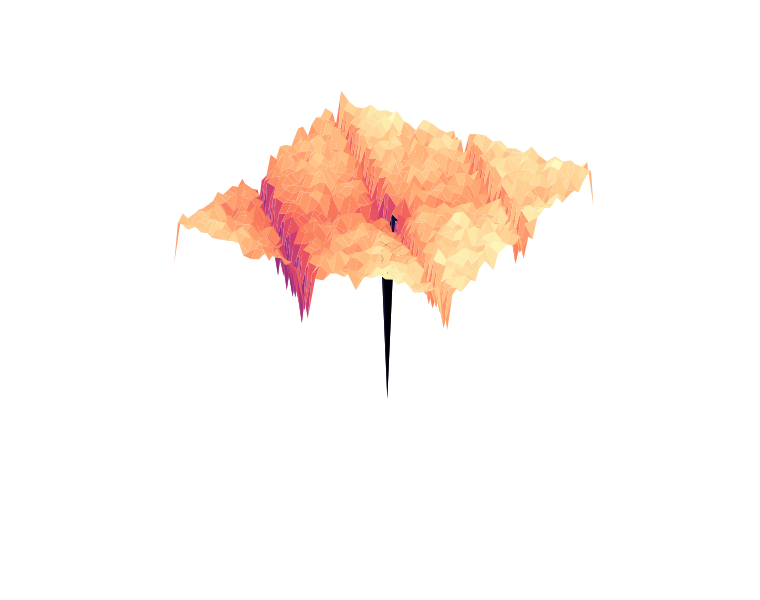

In [78]:
visualizations.viz_2d_3d(golden_net, 
                         seed=PLOT_SEED,
                         loss_name="g",
                         save_to="g-golden-3d.pdf",
                         golden_net=golden_net,
                         show_min=False,
                         show_golden=False,
                         train_corpus=train_corpus,
                         test_corpus=test_corpus,
                         num_points=35, 
                         scale_range=1,
                         show_3d_axis=False,
                         plot_2d=False,
                        )

## L1

### Golden

2507.922119140625
2473.042724609375


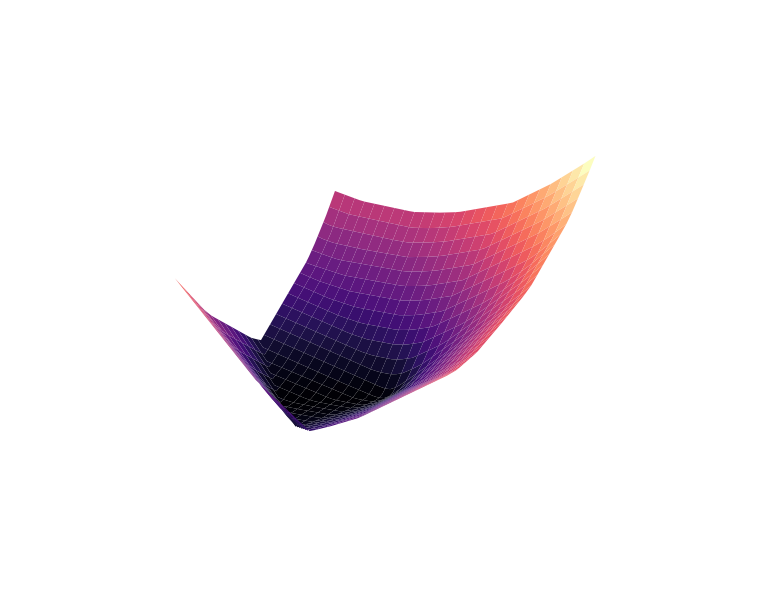

In [5]:
visualizations.viz_2d_3d(golden_net, 
                         seed=PLOT_SEED,
                         plot_2d=False,
                         loss_name="l1",
                         show_3d_axis=False,
                         golden_net=golden_net,
                         test_corpus=test_corpus,
                         num_points=51,
                         show_min=False,
                         show_golden=False,
                         scale_range=1,
                        )

## L2

### Golden

404328.75
372381.84375


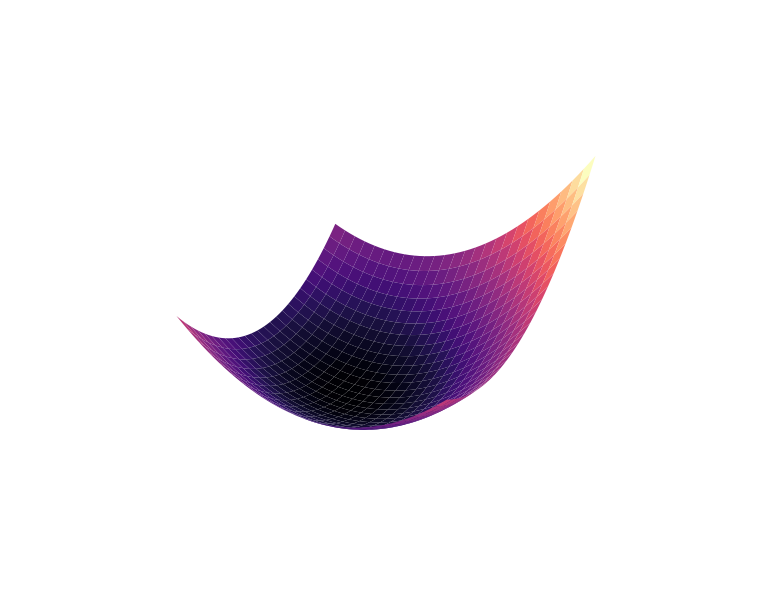

In [6]:
visualizations.viz_2d_3d(golden_net, 
                         seed=PLOT_SEED,
                         plot_2d=False,
                         loss_name="l2", 
                         show_3d_axis=False,
                         test_corpus=test_corpus,
                         golden_net=golden_net,
                         num_points=51, 
                         show_min=False,
                         show_golden=False,
                         scale_range=1,
                        )

# Figure 2

## Golden

### CE + L1 (1)

#### 2D

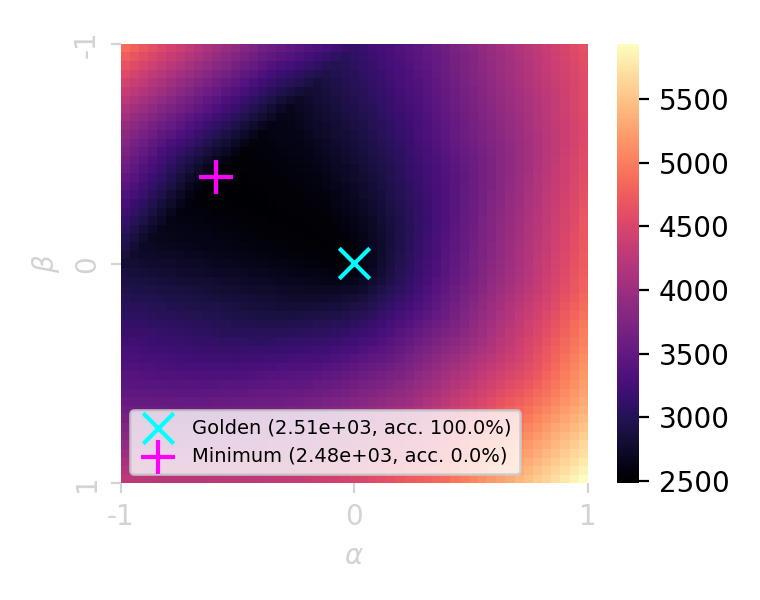

In [12]:
visualizations.viz_2d_3d(golden_net, 
                         seed=PLOT_SEED,
                         loss_name="ce_train_avg", 
                         golden_net=golden_net,
                         train_corpus=train_corpus,
                         test_corpus=test_corpus,
                         regularization="l1",
                         regularization_lambda=1,
                         num_points=51, 
                         plot_3d=False,
                         scale_range=1,
                         save_to="golden-train-ce-l1-1-2d.png"
                        )

#### 3D

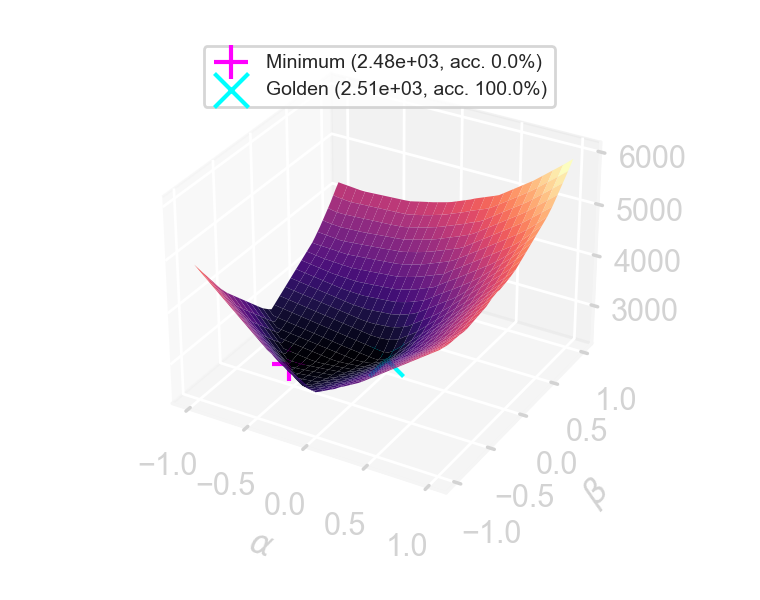

In [48]:
visualizations.viz_2d_3d(golden_net, 
                         seed=PLOT_SEED,
                         loss_name="ce_train_avg", 
                         golden_net=golden_net,
                         train_corpus=train_corpus,
                         test_corpus=test_corpus,
                         regularization="l1",
                         regularization_lambda=1,
                         num_points=51, 
                         plot_2d=False,
                         scale_range=1,
                         save_to="golden-train-ce-l1-1-3d.png"
                        )

### CE + L2 (1)

#### 2D

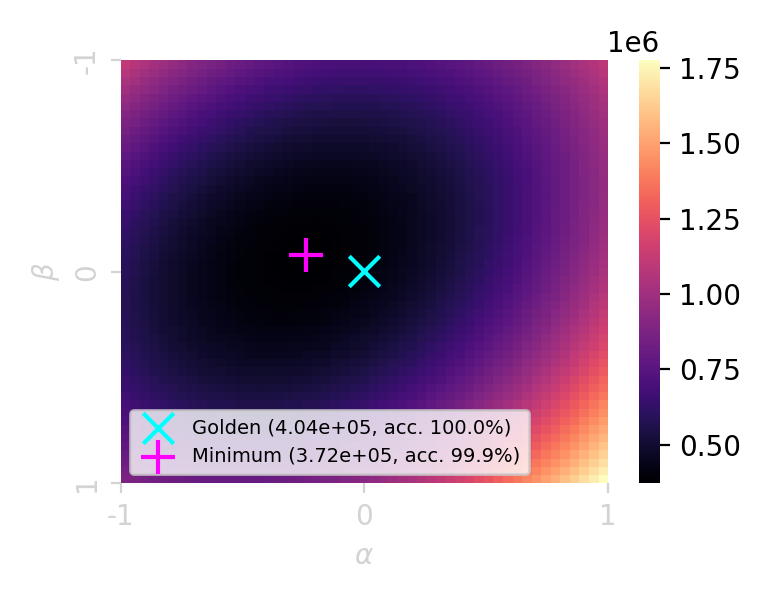

In [13]:
visualizations.viz_2d_3d(golden_net,
                         seed=PLOT_SEED,
                         loss_name="ce_train_avg", 
                         golden_net=golden_net,
                         train_corpus=train_corpus,
                         test_corpus=test_corpus,
                         regularization="l2",
                         regularization_lambda=1,
                         num_points=51, 
                         plot_3d=False,
                         scale_range=1,
                         save_to="golden-train-ce-l2-1-2d.png"
                        )

#### 3D

In [ ]:
visualizations.viz_2d_3d(golden_net,
                         seed=PLOT_SEED,
                         loss_name="ce_train_avg", 
                         golden_net=golden_net,
                         train_corpus=train_corpus,
                         test_corpus=test_corpus,
                         regularization="l2",
                         regularization_lambda=1,
                         num_points=51, 
                         plot_2d=False,
                         scale_range=1,
                         save_to="golden-train-ce-l2-1-3d.png"
                        )

### MDL

#### 2D

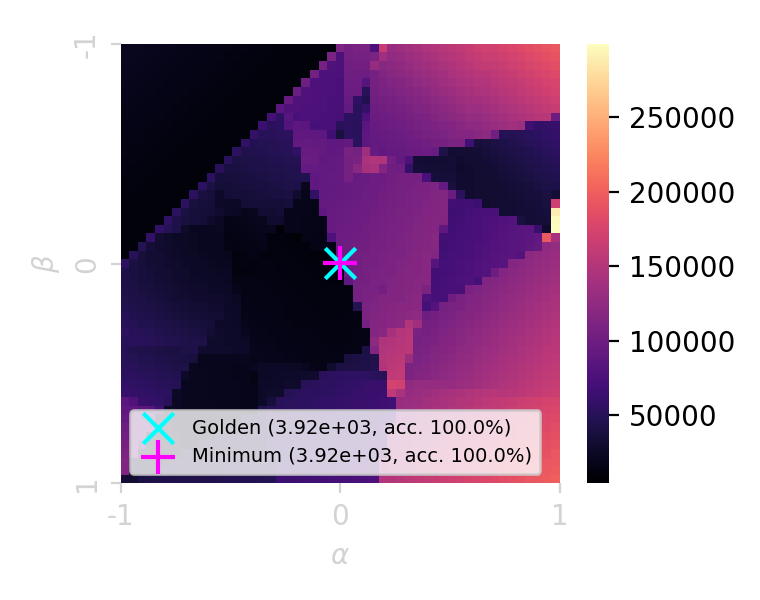

In [14]:
visualizations.viz_2d_3d(golden_net, 
                         seed=PLOT_SEED,
                         loss_name="mdl_train", 
                         golden_net=golden_net,
                         train_corpus=train_corpus,
                         test_corpus=test_corpus,
                         regularization=None,
                         regularization_lambda=None,
                         num_points=51, 
                         plot_3d=False,
                         scale_range=1,
                         save_to="golden-train-mdl-2d.png"
                        )

#### 3D

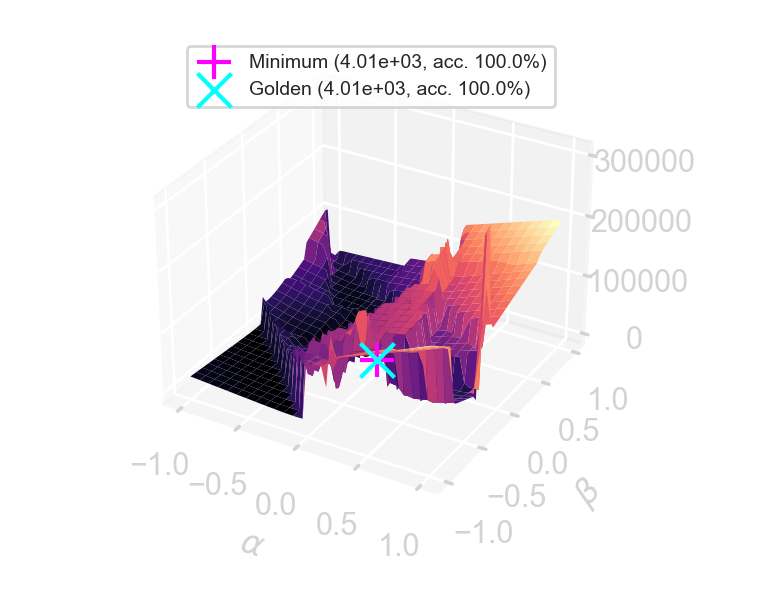

In [57]:
visualizations.viz_2d_3d(golden_net, 
                         seed=PLOT_SEED,
                         loss_name="mdl_train", 
                         golden_net=golden_net,
                         train_corpus=train_corpus,
                         test_corpus=test_corpus,
                         regularization=None,
                         regularization_lambda=None,
                         num_points=51, 
                         plot_2d=False,
                         scale_range=1,
                         computed_zorder=False,
                         save_to="golden-train-mdl-3d.png"
                        )

## Best trained

### CE

#### 2D

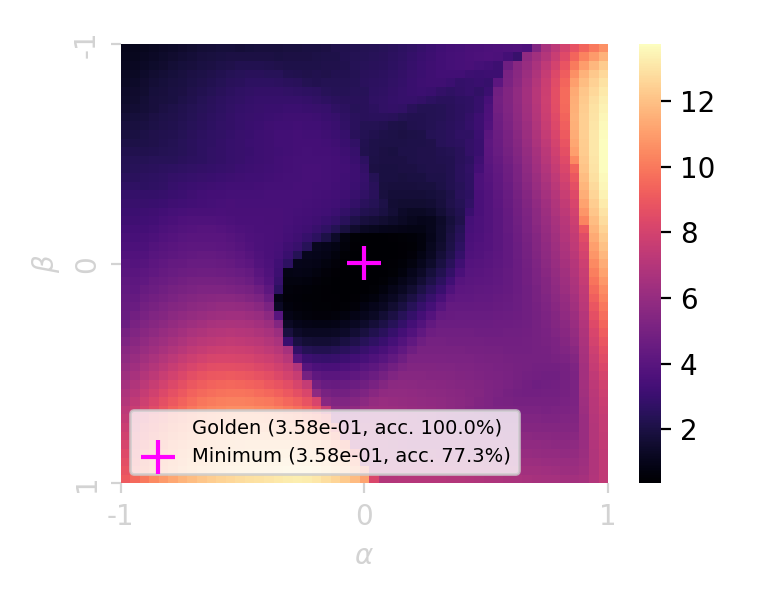

In [33]:
visualizations.viz_2d_3d(best_trained_net, 
                         seed=PLOT_SEED,
                         loss_name="ce_train_avg", 
                         golden_net=golden_net,
                         train_corpus=train_corpus,
                         test_corpus=test_corpus,
                         regularization=None,
                         regularization_lambda=None,
                         num_points=51, 
                         plot_3d=False,
                         scale_range=1,
                         save_to="best-train-ce-no-reg-2d.png"
                        )

#### 3D

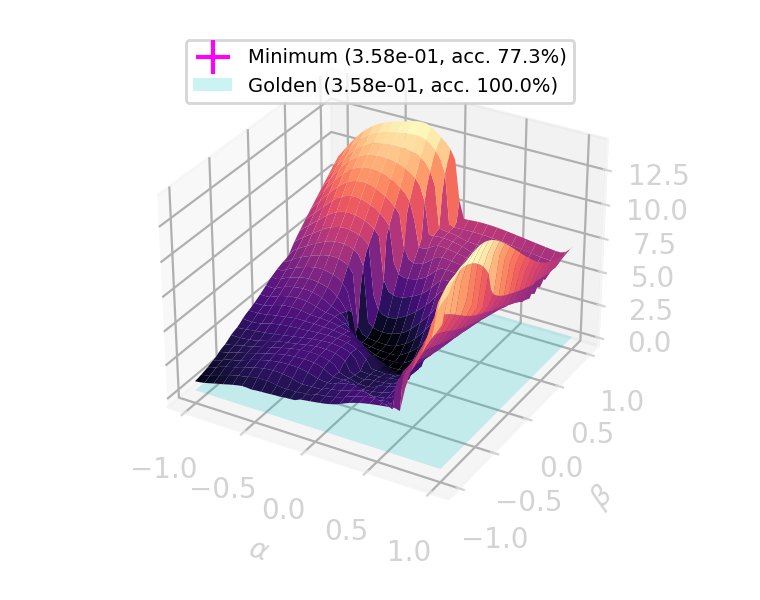

In [8]:
visualizations.viz_2d_3d(best_trained_net, 
                         seed=PLOT_SEED,
                         loss_name="ce_train_avg", 
                         golden_net=golden_net,
                         train_corpus=train_corpus,
                         test_corpus=test_corpus,
                         regularization=None,
                         regularization_lambda=None,
                         num_points=51, 
                         plot_2d=False,
                         scale_range=1,
                         computed_zorder=True,
                         save_to="best-train-ce_.png"
                        )

### CE + L1(1)

#### 2D

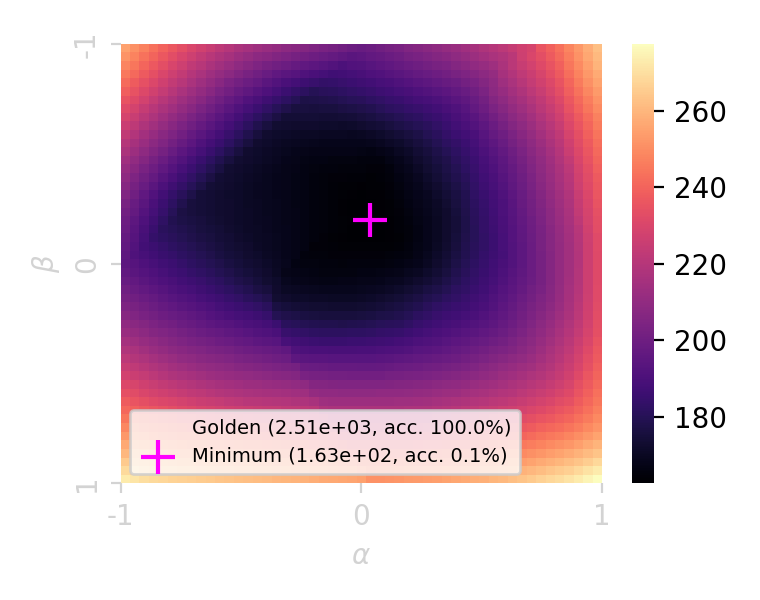

In [11]:
visualizations.viz_2d_3d(best_trained_net, 
                         seed=PLOT_SEED,
                         loss_name="ce_train_avg", 
                         golden_net=golden_net,
                         train_corpus=train_corpus,
                         test_corpus=test_corpus,
                         regularization="l1",
                         regularization_lambda=1,
                         num_points=51, 
                         plot_3d=False,
                         scale_range=1,
                         save_to="best-train-l1_.png"
                        )

#### 3D

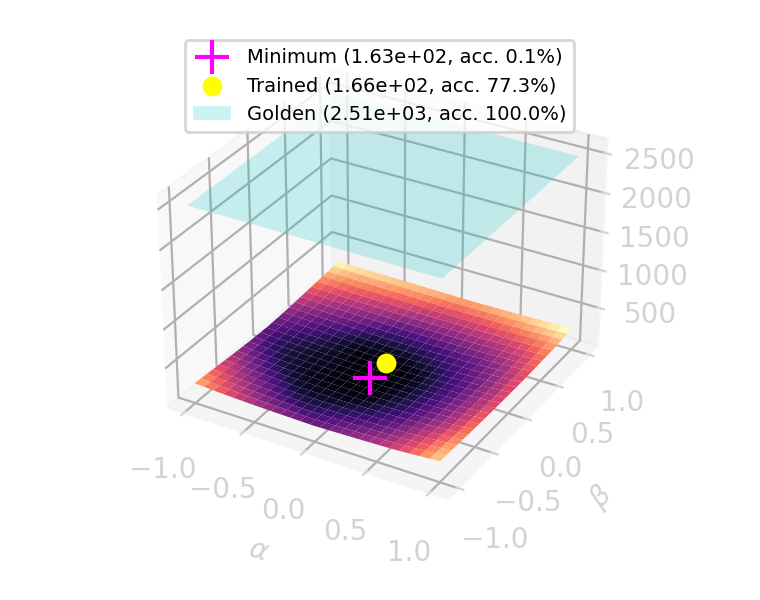

In [5]:
visualizations.viz_2d_3d(best_trained_net, 
                         seed=PLOT_SEED,
                         loss_name="ce_train_avg", 
                         golden_net=golden_net,
                         train_corpus=train_corpus,
                         test_corpus=test_corpus,
                         regularization="l1",
                         regularization_lambda=1,
                         num_points=51, 
                         plot_2d=False,
                         scale_range=1,
                         save_to="best-train-l1_.png",
                         best_marker_offsets=(0,0,0),
                         computed_zorder=False
                        )

### CE + L2(1)

#### 2D

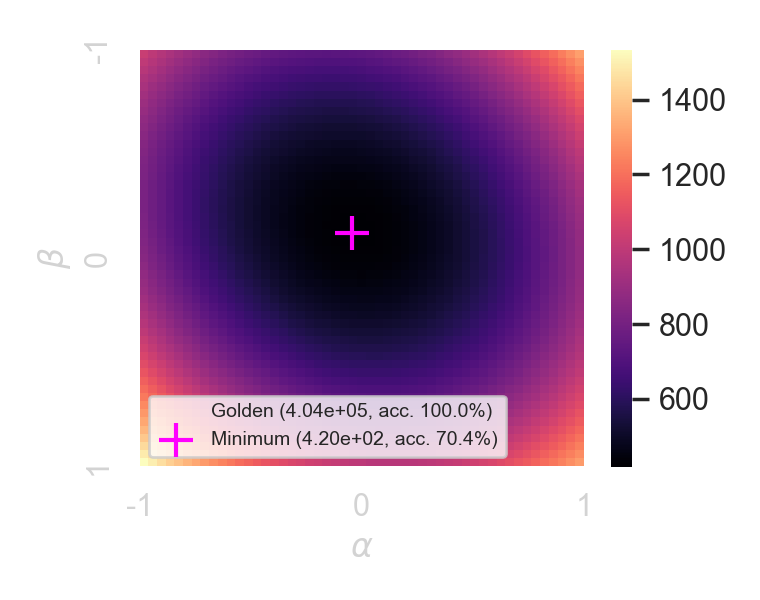

In [56]:
visualizations.viz_2d_3d(best_trained_net, 
                         seed=PLOT_SEED,
                         loss_name="ce_train_avg", 
                         golden_net=golden_net,
                         train_corpus=train_corpus,
                         test_corpus=test_corpus,
                         regularization="l2",
                         regularization_lambda=1,
                         num_points=51, 
                         plot_3d=False,
                         scale_range=1,
                         save_to="best-train-train-ce-l2-1-2d.png"
                        )

#### 3D

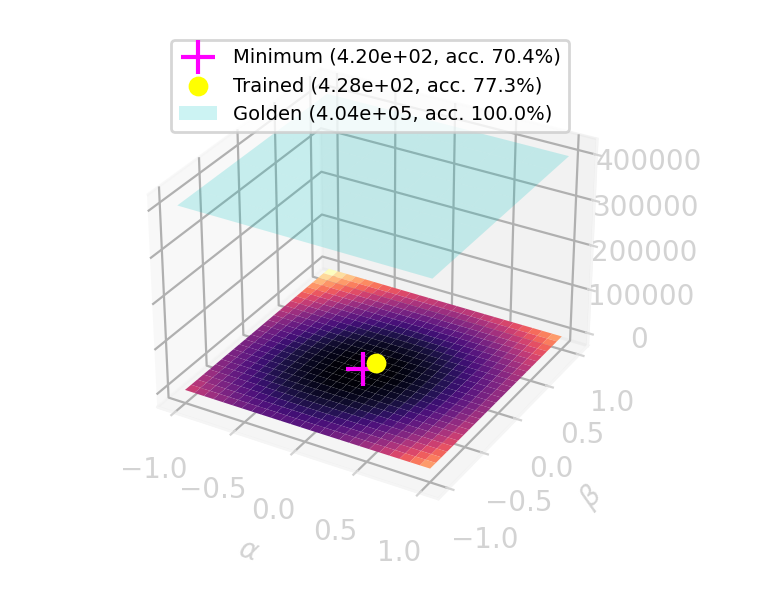

In [15]:
visualizations.viz_2d_3d(best_trained_net, 
                         seed=PLOT_SEED,
                         loss_name="ce_train_avg", 
                         golden_net=golden_net,
                         train_corpus=train_corpus,
                         test_corpus=test_corpus,
                         show_min=True,
                         regularization="l2",
                         regularization_lambda=1,
                         num_points=51, 
                         plot_2d=False,
                         scale_range=1,
                         computed_zorder=False,
                         # best_marker_offsets=(-0.1,0,0,),
                         save_to="best-train-l2-3d_.png"
                        )

### MDL

#### 2D

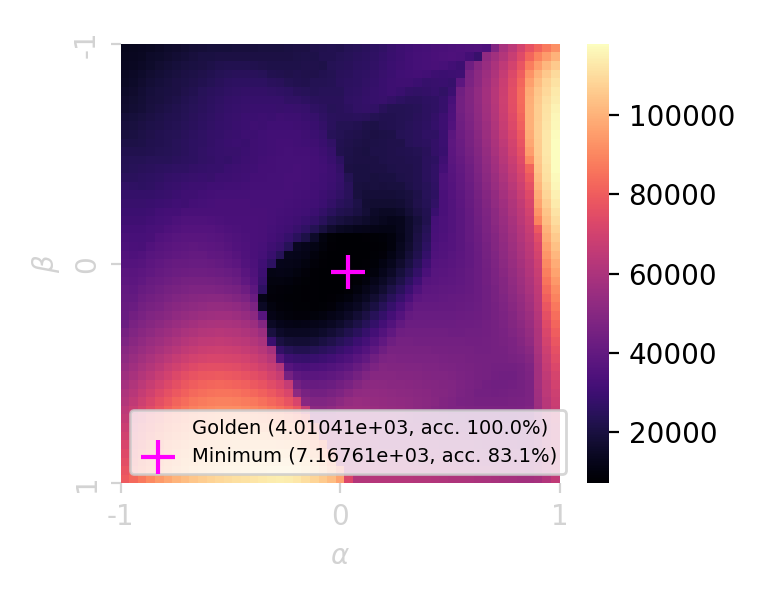

In [16]:
visualizations.viz_2d_3d(best_trained_net, 
                         seed=PLOT_SEED,
                         loss_name="mdl_train", 
                         golden_net=golden_net,
                         train_corpus=train_corpus,
                         test_corpus=test_corpus,
                         regularization=None,
                         regularization_lambda=None,
                         num_points=51, 
                         plot_3d=False,
                         scale_range=1,
                         save_to="best-train-train-mdl-2d.png"
                        )

#### 3D

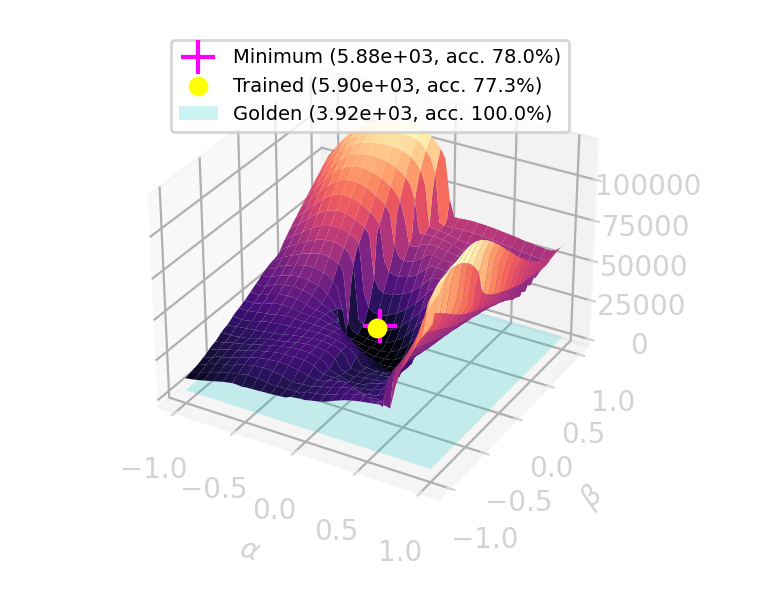

In [27]:
visualizations.viz_2d_3d(best_trained_net, 
                         seed=PLOT_SEED,
                         loss_name="mdl_train", 
                         golden_net=golden_net,
                         train_corpus=train_corpus,
                         test_corpus=test_corpus,
                         regularization=None,
                         regularization_lambda=None,
                         num_points=51, 
                         computed_zorder=False,
                         plot_2d=False,
                         scale_range=1,
                         best_marker_offsets=(0,0,20000), # angle adjustment because of bad matploit 3d projections
                         save_to="best-train-mdl-3d_.png"
                        )

# Exhaustive lambdas

In [75]:
import paper_stats

nets = {"golden": golden_net, 
        "best_trained": best_trained_net, 
        "best_trained_no_early": best_trained_no_early_stop}

dfs = [paper_stats.compute_exhaustive_lambdas(net, num_points=51, scale_range=1, seed=PLOT_SEED, train_corpus=train_corpus, test_corpus=test_corpus, name=name) for name, net in nets.items()]

paper_stats.gen_exhaustive_lambdas_table(dfs)

# Accuracy

In [79]:
networks.get_accuracy(golden_net, test_corpus)

1.0

In [81]:
networks.get_accuracy(best_trained_net, test_corpus)

0.7732781854569714

In [82]:
networks.get_accuracy(best_trained_no_early_stop, test_corpus)

0.6497318212141427

# Memory & Probabs

In [57]:
plot_n = 73

## Golden

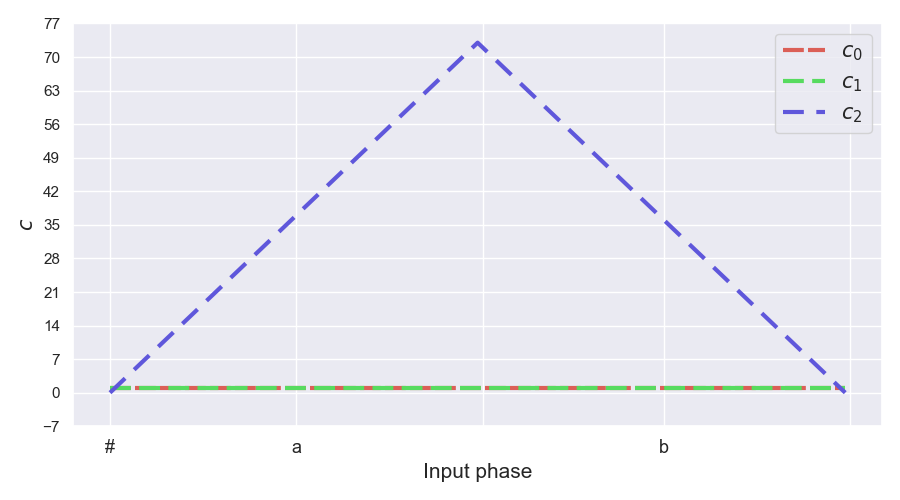

In [58]:
visualizations.plot_memory(
    golden_net, n=plot_n, save_to=f"memory-n{plot_n}-golden.png", title=None
)

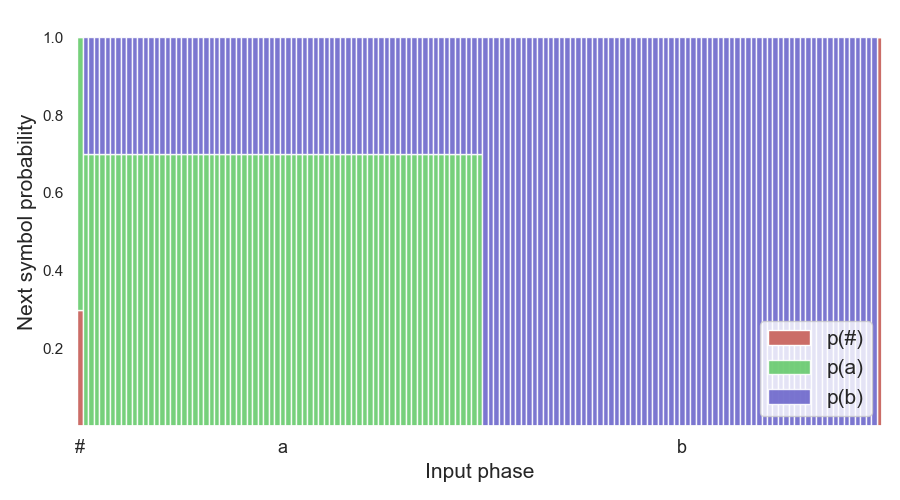

In [59]:
visualizations.plot_net_probabs(
    golden_net, n=plot_n, save_to=f"probabs-n{plot_n}-golden.png", title=None
)

## Best trained, with early stop

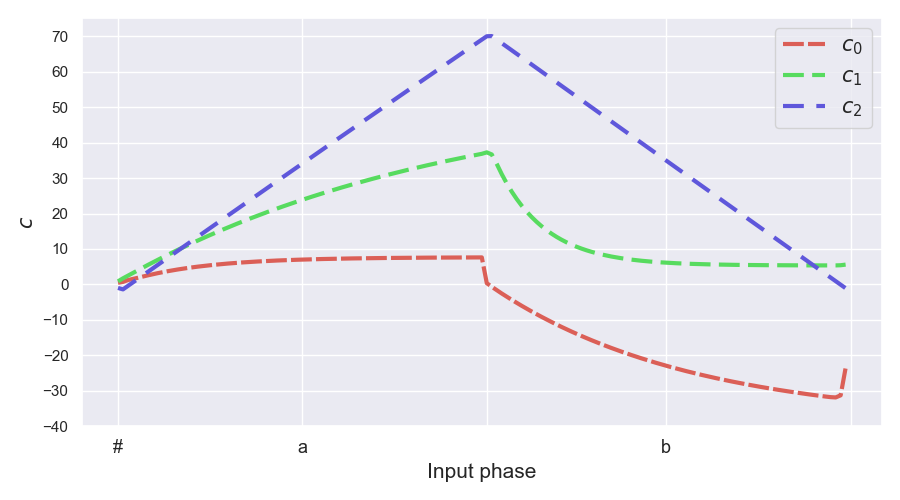

In [60]:
visualizations.plot_memory(
    best_trained_net, n=plot_n, save_to=f"memory-n{plot_n}-trained.png", title=None
)

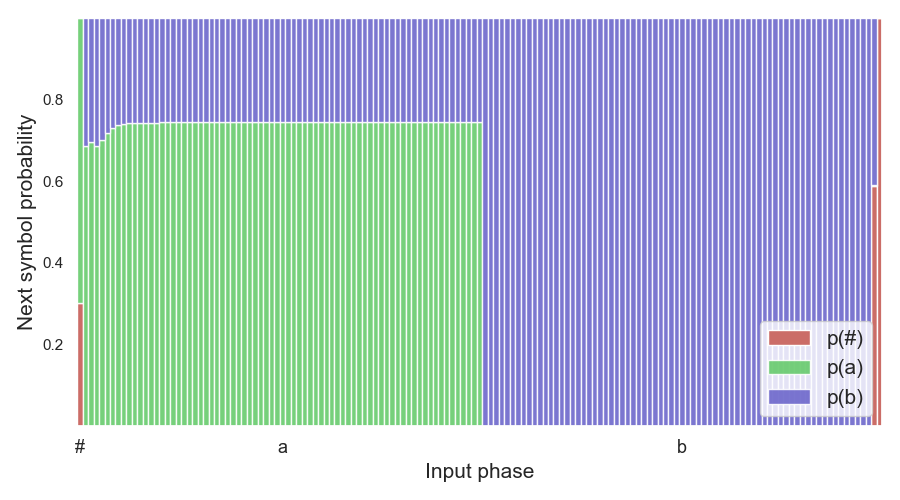

In [64]:
visualizations.plot_net_probabs(
    best_trained_net, n=plot_n, save_to=f"probabs-n{plot_n}-trained.png", title=None
)

## Best trained, no early stop

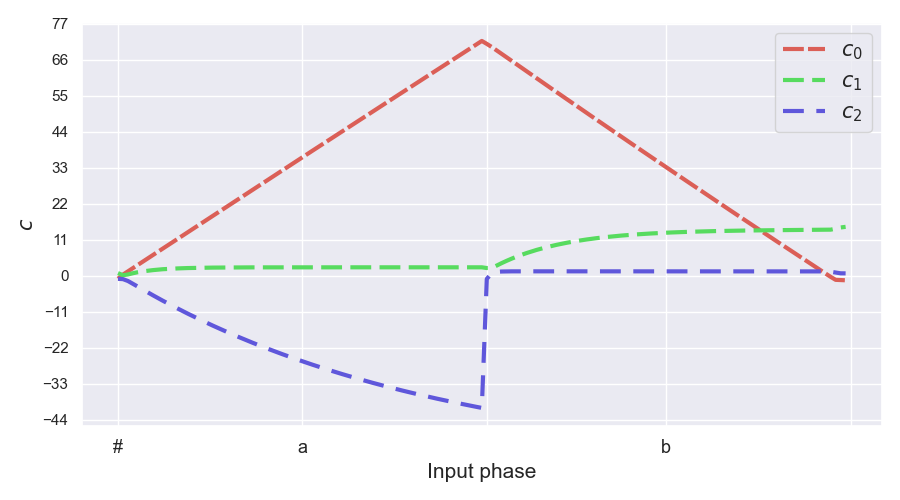

In [65]:
visualizations.plot_memory(
    best_trained_no_early_stop, n=plot_n, save_to=f"memory-n{plot_n}-trained_no_early_stop.png", title=None
)

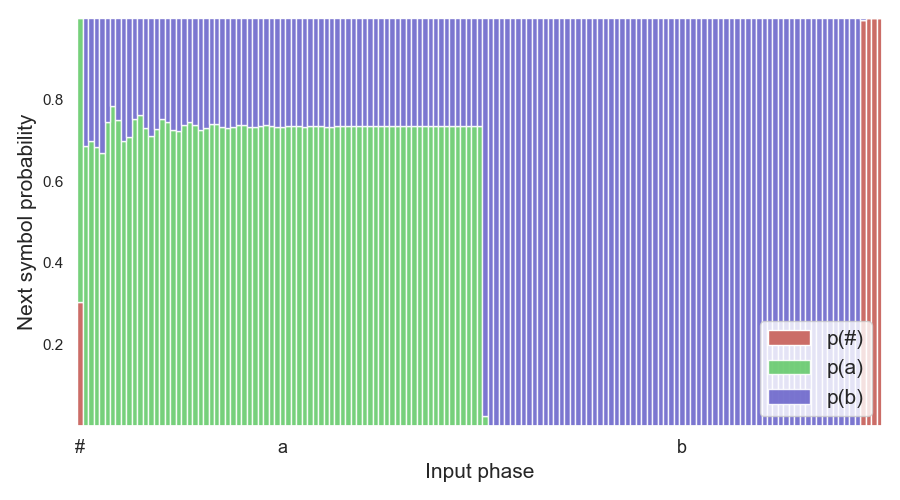

In [67]:
visualizations.plot_net_probabs(
    best_trained_no_early_stop, n=plot_n, save_to=f"probabs-n{plot_n}-trained_no_early_stop.png", title=None
)